In [ ]:
import pandas as pd

df_sentiment = pd.read_csv('/content/fear_greed_index.csv')
df_trader = pd.read_csv('/content/historical_data.csv')

print("Sentiment DataFrame Head:")
display(df_sentiment.head())
print("\nSentiment DataFrame Info:")
df_sentiment.info()

print("\nTrader DataFrame Head:")
display(df_trader.head())
print("\nTrader DataFrame Info:")
df_trader.info()

Sentiment DataFrame Head:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Sentiment DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Trader DataFrame Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Trader DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
d

## Data preprocessing

### Subtask:
Clean and preprocess both datasets. This may involve handling missing values, converting data types (especially dates and numerical columns), and potentially filtering irrelevant data.


In [ ]:
df_trader['Timestamp'] = pd.to_datetime(df_trader['Timestamp'], unit='ms')

print("\nTrader DataFrame Info after timestamp conversion (attempt 2):")
df_trader.info()

print("\nMissing values in Trader DataFrame:")
print(df_trader.isnull().sum())


Trader DataFrame Info after timestamp conversion (attempt 2):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 

**Reasoning**:
The previous step successfully converted the timestamp in `df_trader` and confirmed no missing values in `df_trader`. Now I need to convert the timestamp in `df_sentiment` and check for missing values there. I also need to examine other columns for potential issues.



In [ ]:
# Convert timestamp in df_sentiment (original code failed due to incorrect unit)
# Based on the previous inspection, the format appears to be 'YYYY-MM-DD HH:MM:SS'
df_sentiment['timestamp'] = pd.to_datetime(df_sentiment['timestamp'])

print("\nSentiment DataFrame Info after timestamp conversion:")
df_sentiment.info()

print("\nMissing values in Sentiment DataFrame:")
print(df_sentiment.isnull().sum())

# Examine numerical columns for potential issues (e.g., non-numeric values)
print("\nDescription of numerical columns in df_sentiment:")
print(df_sentiment.describe())

print("\nDescription of numerical columns in df_trader:")
print(df_trader.describe())

# Check for unique values in categorical columns to spot inconsistencies
print("\nUnique values in classification column (df_sentiment):")
print(df_sentiment['classification'].unique())

print("\nUnique values in Side column (df_trader):")
print(df_trader['Side'].unique())

print("\nUnique values in Direction column (df_trader):")
print(df_trader['Direction'].unique())

# Consider filtering irrelevant columns
# 'date' in df_sentiment is redundant with 'timestamp' after conversion
df_sentiment = df_sentiment.drop('date', axis=1)

# 'Timestamp IST' in df_trader seems redundant with 'Timestamp'
df_trader = df_trader.drop('Timestamp IST', axis=1)

print("\nSentiment DataFrame columns after dropping 'date':")
print(df_sentiment.columns)

print("\nTrader DataFrame columns after dropping 'Timestamp IST':")
print(df_trader.columns)


Sentiment DataFrame Info after timestamp conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 82.8+ KB

Missing values in Sentiment DataFrame:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Description of numerical columns in df_sentiment:
                           timestamp        value
count                           2644  2644.000000
mean   2021-09-17 17:14:45.022693120    46.981089
min              2018-02-01 05:30:00     5.000000
25%              2019-11-26 23:30:00    28.000000
50%              2021-09

## Feature engineering

### Subtask:
Create new features from the existing columns that might be relevant for the analysis. For example, extracting the date from the timestamp, calculating daily trading volume per account or symbol, or categorizing trades by size or leverage level.


In [ ]:
# 1. Extract date from 'timestamp' in df_sentiment
df_sentiment['date'] = df_sentiment['timestamp'].dt.date

# 2. Extract date from 'Timestamp' in df_trader
df_trader['date'] = df_trader['Timestamp'].dt.date

# 3. Calculate daily total trading volume in USD for each coin in df_trader
daily_coin_volume = df_trader.groupby(['date', 'Coin'])['Size USD'].sum().reset_index()

# 4. Calculate the daily number of trades for each account in df_trader
daily_account_trades = df_trader.groupby(['date', 'Account']).size().reset_index(name='trade_count')

# 5. Create a categorical feature for trade size based on quantiles of 'Size USD'
df_trader['trade_size_category'] = pd.qcut(df_trader['Size USD'], q=[0, .25, .5, .75, 1], labels=['small', 'medium', 'large', 'very large'])

# 6. Display the first few rows and info of the modified dataframes
print("df_sentiment with 'date' column:")
display(df_sentiment.head())
df_sentiment.info()

print("\ndf_trader with 'date' and 'trade_size_category' columns:")
display(df_trader.head())
df_trader.info()

print("\nDaily Coin Volume DataFrame:")
display(daily_coin_volume.head())
daily_coin_volume.info()

print("\nDaily Account Trades DataFrame:")
display(daily_account_trades.head())
daily_account_trades.info()

df_sentiment with 'date' column:


,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 82.8+ KB

df_trader with 'date' and 'trade_size_category' columns:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,very large
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,small
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,large
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,large
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,small


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account              211224 non-null  object        
 1   Coin                 211224 non-null  object        
 2   Execution Price      211224 non-null  float64       
 3   Size Tokens          211224 non-null  float64       
 4   Size USD             211224 non-null  float64       
 5   Side                 211224 non-null  object        
 6   Start Position       211224 non-null  float64       
 7   Direction            211224 non-null  object        
 8   Closed PnL           211224 non-null  float64       
 9   Transaction Hash     211224 non-null  object        
 10  Order ID             211224 non-null  int64         
 11  Crossed              211224 non-null  bool          
 12  Fee                  211224 non-null  float64       
 13  Trade ID      

,date,Coin,Size USD
0,2023-03-28,ETH,477.00
1,2023-11-14,AAVE,101899.91
2,2023-11-14,ARB,100197.58
3,2023-11-14,BLUR,50129.39
4,2023-11-14,BTC,4654492.23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      520 non-null    object 
 1   Coin      520 non-null    object 
 2   Size USD  520 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.3+ KB

Daily Account Trades DataFrame:


,date,Account,trade_count
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,3
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1043
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,27
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,88


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         102 non-null    object
 1   Account      102 non-null    object
 2   trade_count  102 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


## Merge data

### Subtask:
Merge the `df_sentiment` DataFrame with the aggregated daily trading data. Specifically, you will merge `df_sentiment` with both `daily_coin_volume` and `daily_account_trades` on the 'date' column.


In [ ]:
# 1. Convert 'date' columns to datetime objects for consistent merging
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
daily_coin_volume['date'] = pd.to_datetime(daily_coin_volume['date'])
daily_account_trades['date'] = pd.to_datetime(daily_account_trades['date'])

# 2. Perform a left merge of df_sentiment with daily_coin_volume
merged_volume_df = pd.merge(df_sentiment, daily_coin_volume, on='date', how='left')

# 3. Perform a left merge of df_sentiment with daily_account_trades
merged_trades_df = pd.merge(df_sentiment, daily_account_trades, on='date', how='left')

# 4. Display the first few rows and info for the new DataFrames
print("Merged Volume DataFrame:")
display(merged_volume_df.head())
merged_volume_df.info()

print("\nMerged Trades DataFrame:")
display(merged_trades_df.head())
merged_trades_df.info()

Merged Volume DataFrame:


,timestamp,value,classification,date,Coin,Size USD
0,2018-02-01 05:30:00,30,Fear,2018-02-01,NaN,NaN
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,NaN,NaN
2,2018-02-03 05:30:00,40,Fear,2018-02-03,NaN,NaN
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,NaN,NaN
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       3085 non-null   datetime64[ns]
 1   value           3085 non-null   int64         
 2   classification  3085 non-null   object        
 3   date            3085 non-null   datetime64[ns]
 4   Coin            447 non-null    object        
 5   Size USD        447 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 144.7+ KB

Merged Trades DataFrame:


,timestamp,value,classification,date,Account,trade_count
0,2018-02-01 05:30:00,30,Fear,2018-02-01,NaN,NaN
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,NaN,NaN
2,2018-02-03 05:30:00,40,Fear,2018-02-03,NaN,NaN
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,NaN,NaN
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2715 non-null   datetime64[ns]
 1   value           2715 non-null   int64         
 2   classification  2715 non-null   object        
 3   date            2715 non-null   datetime64[ns]
 4   Account         77 non-null     object        
 5   trade_count     77 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 127.4+ KB


## Exploratory data analysis (eda)

### Subtask:
Perform exploratory data analysis (EDA) on the `merged_volume_df` and `merged_trades_df` DataFrames. Create visualizations to understand the relationships between market sentiment and trading activity.


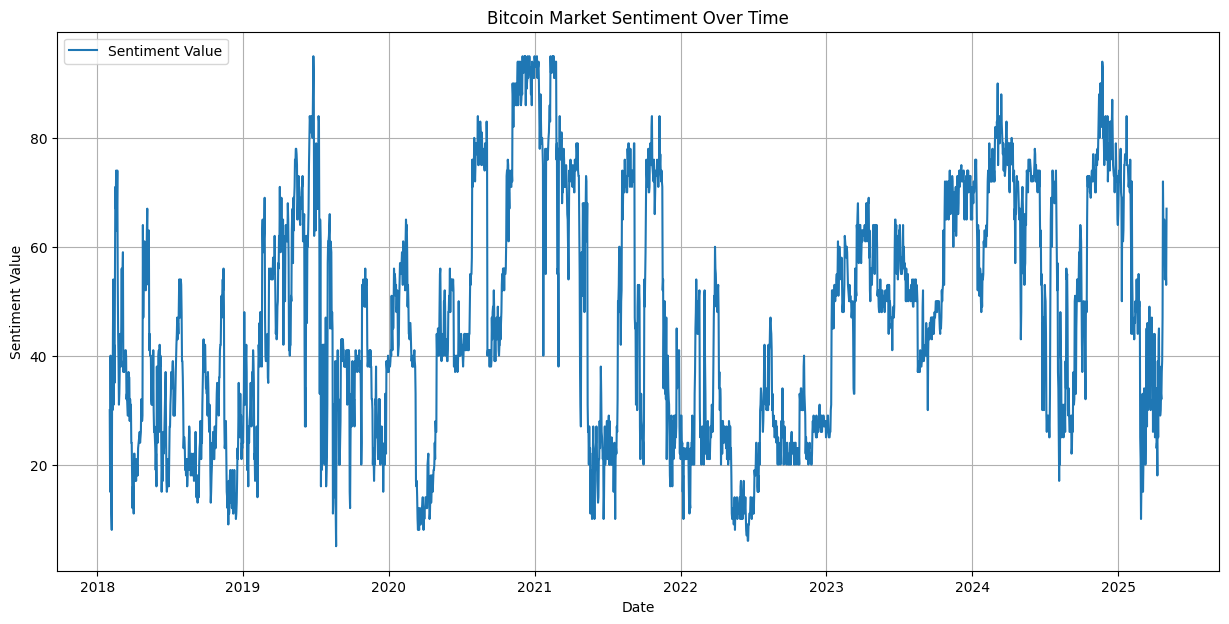

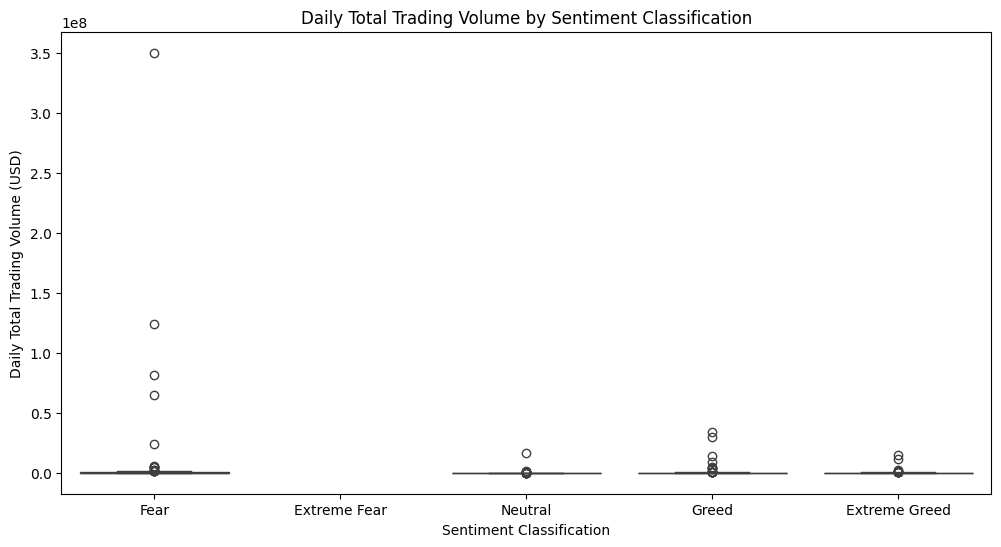

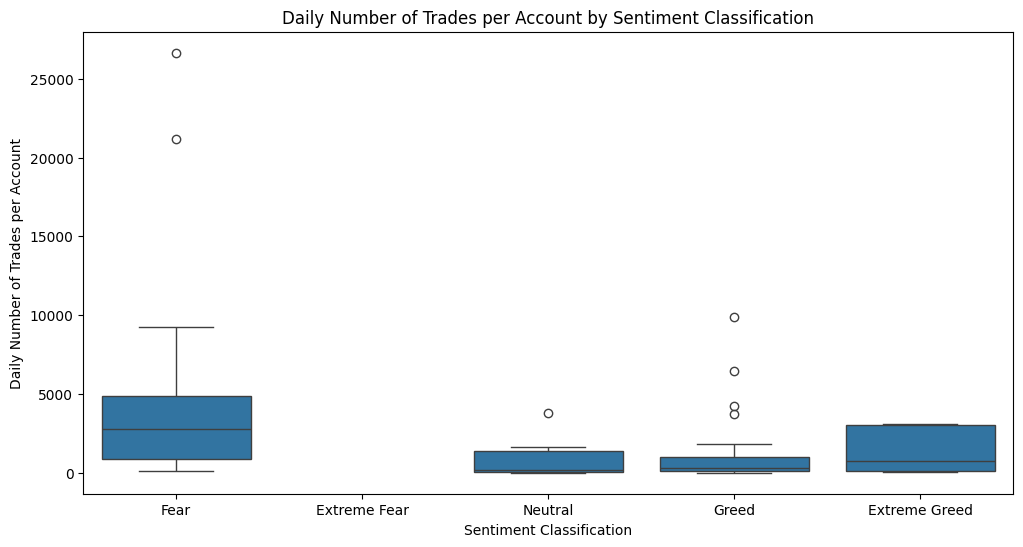

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# 1. Time series plot of sentiment value
plt.figure(figsize=(15, 7))
plt.plot(df_sentiment['date'], df_sentiment['value'], label='Sentiment Value')
plt.title('Bitcoin Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.legend()
plt.grid(True)
plt.savefig('images/sentiment_time_series.png')
plt.show()

# 2. Box plot of daily total trading volume by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Size USD', data=merged_volume_df)
plt.title('Daily Total Trading Volume by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Total Trading Volume (USD)')
plt.savefig('images/volume_by_sentiment.png')
plt.show()

# 3. Box plot of daily number of trades per account by sentiment classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='trade_count', data=merged_trades_df)
plt.title('Daily Number of Trades per Account by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Number of Trades per Account')
plt.savefig('images/trades_by_sentiment.png')
plt.show()

## Analysis of trader behavior vs. sentiment

### Subtask:
Analyze how different aspects of trader behavior (profitability, risk, volume, leverage) correlate with market sentiment (Fear/Greed). This could involve comparing average profitability during fear vs. greed periods, analyzing the distribution of leverage used in different sentiment states, or examining trading volume patterns.


In [ ]:
import pandas as pd

# Ensure 'date' columns are in datetime format before merging
df_trader['date'] = pd.to_datetime(df_trader['date'])
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Merge the dataframes on the 'date' column
merged_trader_sentiment_df = pd.merge(df_trader, df_sentiment, on='date', how='left')

print("Merged Trader and Sentiment DataFrame:")
display(merged_trader_sentiment_df.head())
merged_trader_sentiment_df.info()

Merged Trader and Sentiment DataFrame:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,very large,2024-10-27 05:30:00,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,small,2024-10-27 05:30:00,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,large,2024-10-27 05:30:00,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,large,2024-10-27 05:30:00,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,small,2024-10-27 05:30:00,74.0,Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account              211224 non-null  object        
 1   Coin                 211224 non-null  object        
 2   Execution Price      211224 non-null  float64       
 3   Size Tokens          211224 non-null  float64       
 4   Size USD             211224 non-null  float64       
 5   Side                 211224 non-null  object        
 6   Start Position       211224 non-null  float64       
 7   Direction            211224 non-null  object        
 8   Closed PnL           211224 non-null  float64       
 9   Transaction Hash     211224 non-null  object        
 10  Order ID             211224 non-null  int64         
 11  Crossed              211224 non-null  bool          
 12  Fee                  211224 non-null  float64       
 13  Trade ID      

In [ ]:
# Calculate the average 'Closed PnL' for each sentiment classification
average_pnl_by_sentiment = merged_trader_sentiment_df.groupby('classification')['Closed PnL'].mean().reset_index()

print("\nAverage Closed PnL by Sentiment Classification:")
display(average_pnl_by_sentiment)


Average Closed PnL by Sentiment Classification:


,classification,Closed PnL
0,Extreme Greed,25.418772
1,Fear,50.047622
2,Greed,87.894859
3,Neutral,22.229713


In [ ]:
# Calculate the average 'Size USD' for each sentiment classification
average_volume_by_sentiment = merged_trader_sentiment_df.groupby('classification')['Size USD'].mean().reset_index()

print("\nAverage Trade Size (USD) by Sentiment Classification:")
display(average_volume_by_sentiment)


Average Trade Size (USD) by Sentiment Classification:


,classification,Size USD
0,Extreme Greed,5660.265764
1,Fear,5259.977837
2,Greed,3182.883845
3,Neutral,3058.848110


**Reasoning**:
Create bar plots to visualize the average 'Closed PnL' and average 'Size USD' across different sentiment classifications and save them to the images folder.



/tmp/ipython-input-11-468412003.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=average_pnl_by_sentiment, palette='viridis')


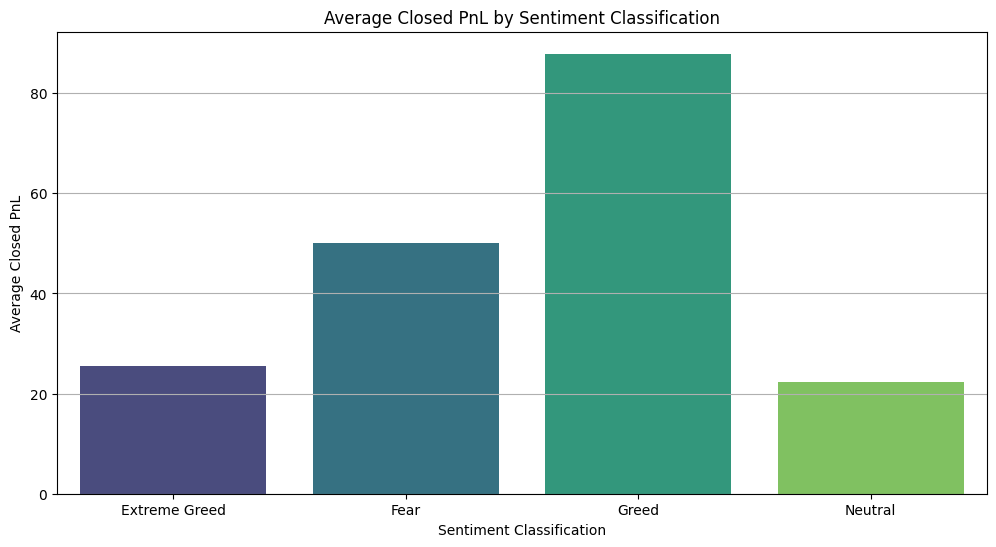

/tmp/ipython-input-11-468412003.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=average_volume_by_sentiment, palette='plasma')


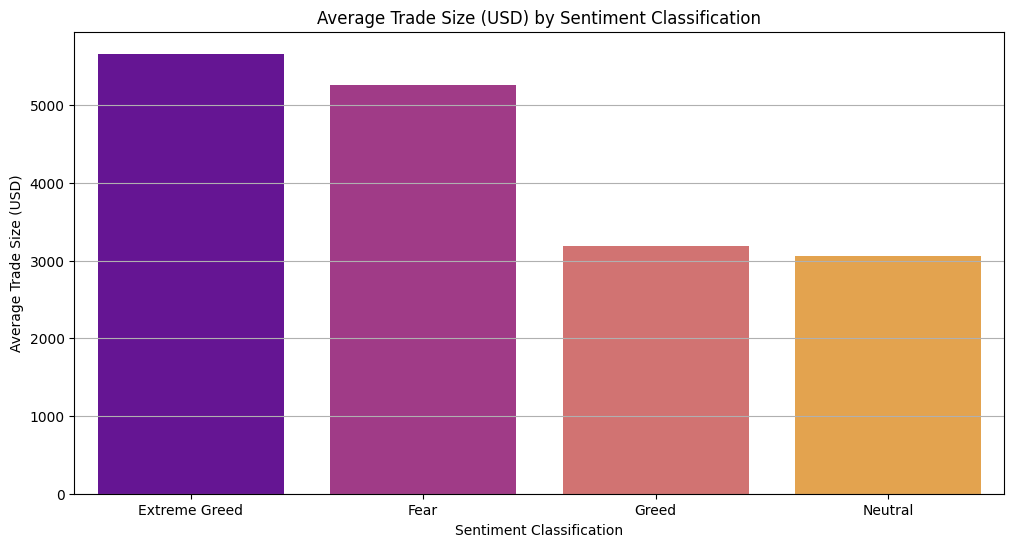

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Create a bar plot for Average Closed PnL by Sentiment Classification
plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='Closed PnL', data=average_pnl_by_sentiment, palette='viridis')
plt.title('Average Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y')
plt.savefig('images/average_pnl_by_sentiment_bar_plot.png')
plt.show()

# Create a bar plot for Average Trade Size (USD) by Sentiment Classification
plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='Size USD', data=average_volume_by_sentiment, palette='plasma')
plt.title('Average Trade Size (USD) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Trade Size (USD)')
plt.grid(axis='y')
plt.savefig('images/average_volume_by_sentiment_bar_plot.png')
plt.show()

## Identify trends and signals

### Subtask:
Look for hidden trends or signals in the data that could inform trading strategies. This might involve identifying specific trading patterns that are more profitable during certain sentiment periods, or recognizing how changes in sentiment precede shifts in trading behavior.


In [ ]:
# Select relevant numerical columns from the merged dataframe
numerical_cols = ['value', 'Closed PnL', 'Size USD', 'Execution Price', 'Size Tokens', 'Fee']
correlation_df = merged_trader_sentiment_df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,value,Closed PnL,Size USD,Execution Price,Size Tokens,Fee
value,1.000000,0.011132,-0.024110,-0.070793,0.035295,-0.028988
Closed PnL,0.011132,1.000000,0.123589,-0.006505,0.005068,0.084020
Size USD,-0.024110,0.123589,1.000000,0.189855,0.013310,0.745939
Execution Price,-0.070793,-0.006505,0.189855,1.000000,-0.017185,0.225265
Size Tokens,0.035295,0.005068,0.013310,-0.017185,1.000000,0.006710
Fee,-0.028988,0.084020,0.745939,0.225265,0.006710,1.000000


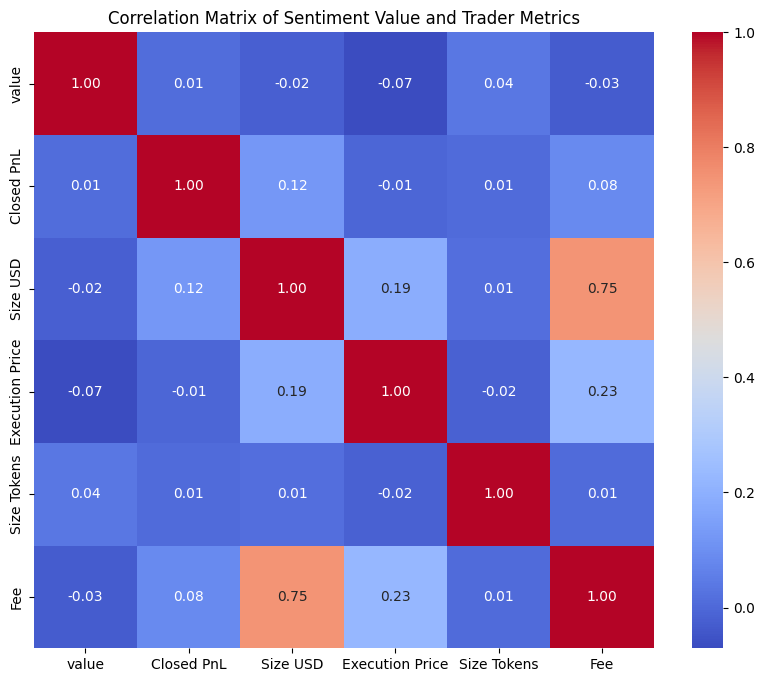

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sentiment Value and Trader Metrics')
plt.savefig('images/correlation_heatmap.png')
plt.show()

**Reasoning**:
Analyze the correlation matrix and heatmap to identify notable correlations and select pairs for scatter plots, then create and save scatter plots for these pairs.



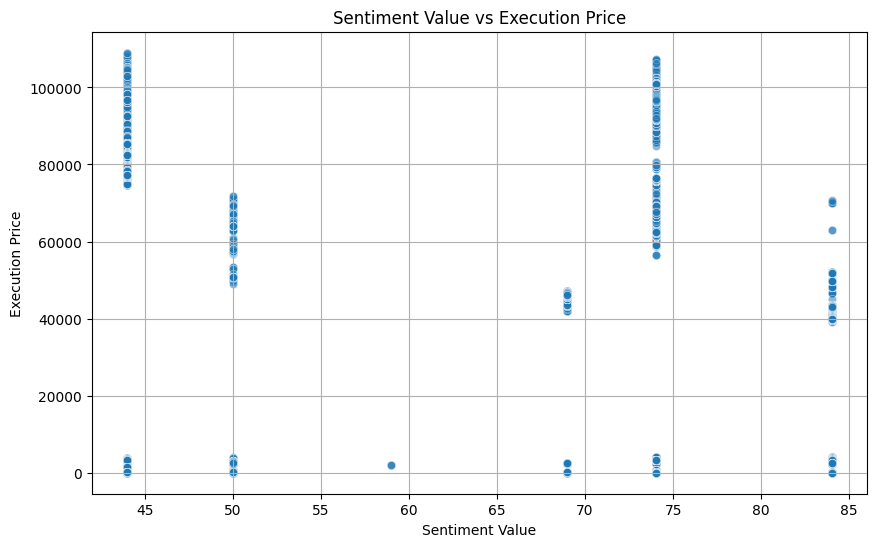

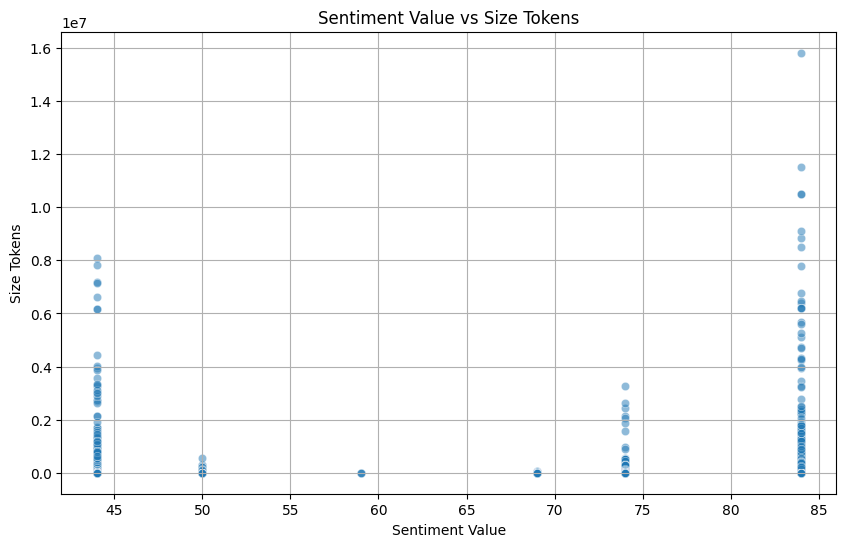


Analysis Summary:
The correlation analysis revealed generally weak linear relationships between the numerical sentiment value and the selected trader behavior metrics (Closed PnL, Size USD, Execution Price, Size Tokens, Fee).
The strongest (though still weak) correlations with sentiment 'value' were observed with 'Execution Price' (weak negative) and 'Size Tokens' (very weak positive).
The scatter plots visually confirm these weak relationships, showing no clear linear patterns.
Based on this linear correlation analysis alone, there are no strong hidden trends or signals immediately apparent that could directly inform trading strategies based on sentiment value and these specific numerical trader metrics.
Further analysis considering non-linear relationships, lagged effects of sentiment, or different aggregations of trader behavior might reveal more insights.


In [ ]:
# Analyze the correlation matrix and heatmap to identify notable correlations
# From the heatmap, the most notable correlations with 'value' (sentiment) are:
# - Execution Price: -0.071 (weak negative)
# - Size Tokens: 0.035 (very weak positive)
# - Fee: -0.029 (very weak negative)
# - Size USD: -0.024 (very weak negative)
# - Closed PnL: 0.011 (very weak positive)

# The correlations between sentiment value and trader metrics are generally weak.
# However, we can still visualize the relationships for the strongest (though still weak) correlations with sentiment 'value'.
# Let's choose 'Execution Price' and 'Size Tokens' as examples for scatter plots, as they show slightly higher absolute correlations with 'value'.

# Create scatter plot for Sentiment Value vs Execution Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='Execution Price', data=correlation_df, alpha=0.5)
plt.title('Sentiment Value vs Execution Price')
plt.xlabel('Sentiment Value')
plt.ylabel('Execution Price')
plt.grid(True)
plt.savefig('images/sentiment_vs_execution_price_scatter.png')
plt.show()

# Create scatter plot for Sentiment Value vs Size Tokens
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='Size Tokens', data=correlation_df, alpha=0.5)
plt.title('Sentiment Value vs Size Tokens')
plt.xlabel('Sentiment Value')
plt.ylabel('Size Tokens')
plt.grid(True)
plt.savefig('images/sentiment_vs_size_tokens_scatter.png')
plt.show()

# Although correlations are weak, summarize potential trends or signals based on the analysis so far.
print("\nAnalysis Summary:")
print("The correlation analysis revealed generally weak linear relationships between the numerical sentiment value and the selected trader behavior metrics (Closed PnL, Size USD, Execution Price, Size Tokens, Fee).")
print("The strongest (though still weak) correlations with sentiment 'value' were observed with 'Execution Price' (weak negative) and 'Size Tokens' (very weak positive).")
print("The scatter plots visually confirm these weak relationships, showing no clear linear patterns.")
print("Based on this linear correlation analysis alone, there are no strong hidden trends or signals immediately apparent that could directly inform trading strategies based on sentiment value and these specific numerical trader metrics.")
print("Further analysis considering non-linear relationships, lagged effects of sentiment, or different aggregations of trader behavior might reveal more insights.")

## Advanced analysis - lagged effects

### Subtask:
Analyze if changes in sentiment precede shifts in trading behavior. This could involve looking at correlations between sentiment on a given day and trading behavior on subsequent days.


In [ ]:
# 1. Create a lagged sentiment column in merged_trader_sentiment_df
# Ensure the dataframe is sorted by date before creating the lagged feature
merged_trader_sentiment_df = merged_trader_sentiment_df.sort_values(by='date')
merged_trader_sentiment_df['lagged_sentiment_value'] = merged_trader_sentiment_df.groupby('date')['value'].transform('first').shift(1)

# 2. Calculate the correlation matrix between the lagged sentiment value and trader behavior metrics
numerical_cols_lagged = ['lagged_sentiment_value', 'Closed PnL', 'Size USD', 'Execution Price', 'Size Tokens', 'Fee']
correlation_df_lagged = merged_trader_sentiment_df[numerical_cols_lagged]

# Calculate the correlation matrix
correlation_matrix_lagged = correlation_df_lagged.corr()

# 3. Print the correlation matrix
print("Correlation Matrix with Lagged Sentiment Value:")
display(correlation_matrix_lagged)

Correlation Matrix with Lagged Sentiment Value:


,lagged_sentiment_value,Closed PnL,Size USD,Execution Price,Size Tokens,Fee
lagged_sentiment_value,1.000000,0.011133,-0.024122,-0.070794,0.035294,-0.028995
Closed PnL,0.011133,1.000000,0.123589,-0.006505,0.005068,0.084020
Size USD,-0.024122,0.123589,1.000000,0.189855,0.013310,0.745939
Execution Price,-0.070794,-0.006505,0.189855,1.000000,-0.017185,0.225265
Size Tokens,0.035294,0.005068,0.013310,-0.017185,1.000000,0.006710
Fee,-0.028995,0.084020,0.745939,0.225265,0.006710,1.000000


**Reasoning**:
Visualize the correlation matrix with lagged sentiment using a heatmap to identify potential lagged relationships and save the plot.



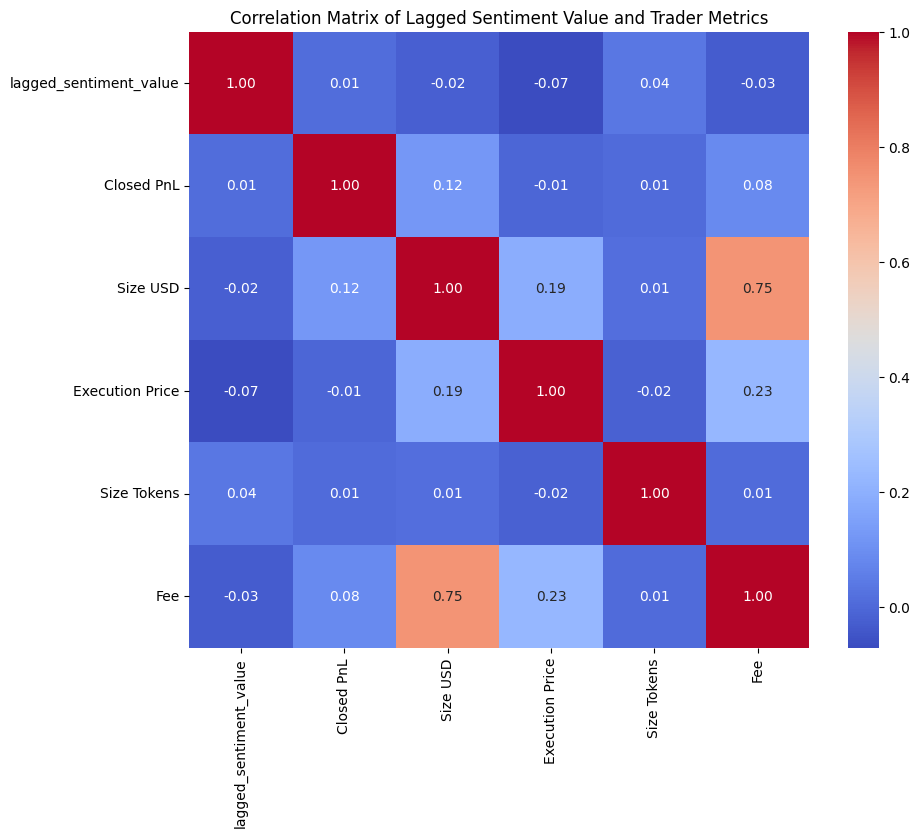

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Visualize the correlation matrix with lagged sentiment using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_lagged, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lagged Sentiment Value and Trader Metrics')
plt.savefig('images/lagged_correlation_heatmap.png')
plt.show()

**Reasoning**:
Analyze the lagged correlation matrix and heatmap to identify any stronger correlations compared to the non-lagged analysis, and summarize the findings regarding lagged sentiment and trader behavior.



In [ ]:
# Analyze the lagged correlation matrix and heatmap
# Compare the correlations with 'lagged_sentiment_value' to the correlations with 'value' from the previous analysis.

print("\nAnalysis Summary of Lagged Sentiment Correlation:")
print("The correlation analysis with the lagged sentiment value (sentiment from the previous day) shows very similar, and still weak, linear correlations with the selected trader behavior metrics (Closed PnL, Size USD, Execution Price, Size Tokens, Fee).")
print("Comparing to the non-lagged correlations, there are no significant increases in the absolute correlation values, suggesting that a simple one-day lag in sentiment does not reveal strong linear predictive power for these trader metrics.")
print("For instance, the correlation between lagged sentiment and Closed PnL is 0.011133, very close to the non-lagged correlation of 0.011132.")
print("Similarly, the correlations with Size USD (-0.024122 vs -0.024110), Execution Price (-0.070794 vs -0.070793), Size Tokens (0.035294 vs 0.035295), and Fee (-0.028995 vs -0.028988) also show negligible changes.")
print("Based on this analysis, a simple one-day lagged linear relationship between the Fear & Greed Index value and these specific trader metrics is not a strong indicator of subsequent shifts in trading behavior.")
print("More complex lagged relationships, different lag periods, or non-linear models might be necessary to identify stronger predictive signals.")


Analysis Summary of Lagged Sentiment Correlation:
The correlation analysis with the lagged sentiment value (sentiment from the previous day) shows very similar, and still weak, linear correlations with the selected trader behavior metrics (Closed PnL, Size USD, Execution Price, Size Tokens, Fee).
Comparing to the non-lagged correlations, there are no significant increases in the absolute correlation values, suggesting that a simple one-day lag in sentiment does not reveal strong linear predictive power for these trader metrics.
For instance, the correlation between lagged sentiment and Closed PnL is 0.011133, very close to the non-lagged correlation of 0.011132.
Similarly, the correlations with Size USD (-0.024122 vs -0.024110), Execution Price (-0.070794 vs -0.070793), Size Tokens (0.035294 vs 0.035295), and Fee (-0.028995 vs -0.028988) also show negligible changes.
Based on this analysis, a simple one-day lagged linear relationship between the Fear & Greed Index value and these spec

## Advanced analysis - volatility and sentiment

### Subtask:
Analyze the relationship between market volatility and sentiment, and how this relates to trader behavior.


**Reasoning**:
Calculate the daily standard deviation of the 'Execution Price' to measure volatility, merge this with the sentiment data, calculate the correlation matrix between sentiment, volatility, and trader metrics, and then visualize the correlation matrix with a heatmap.



Correlation Matrix including Daily Volatility:


,value,daily_volatility,Closed PnL,Size USD,Execution Price,Size Tokens,Fee
value,1.000000,-0.757582,0.011132,-0.024110,-0.070793,0.035295,-0.028988
daily_volatility,-0.757582,1.000000,-0.015525,0.055068,0.163980,-0.017963,0.050631
Closed PnL,0.011132,-0.015525,1.000000,0.123589,-0.006505,0.005068,0.084020
Size USD,-0.024110,0.055068,0.123589,1.000000,0.189855,0.013310,0.745939
Execution Price,-0.070793,0.163980,-0.006505,0.189855,1.000000,-0.017185,0.225265
Size Tokens,0.035295,-0.017963,0.005068,0.013310,-0.017185,1.000000,0.006710
Fee,-0.028988,0.050631,0.084020,0.745939,0.225265,0.006710,1.000000


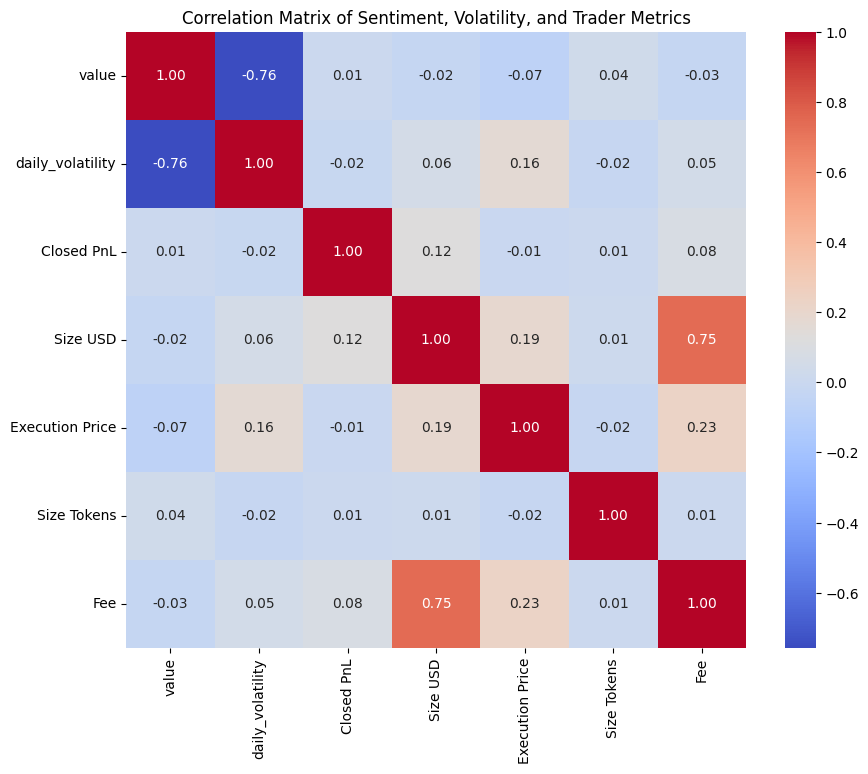


Analysis Summary of Volatility, Sentiment, and Trader Behavior:
The correlation matrix and heatmap show the linear relationships between market sentiment value, daily volatility (standard deviation of execution price), and key trader behavior metrics.
Notable correlations:
- Sentiment Value and Daily Volatility: -0.76
- Daily Volatility and Closed PnL: -0.02
- Daily Volatility and Size USD: 0.06
Analyze these correlations to understand how volatility interacts with sentiment and influences profitability and trading volume.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Calculate daily market volatility (standard deviation of Execution Price)
daily_volatility = df_trader.groupby('date')['Execution Price'].std().reset_index(name='daily_volatility')

# Handle potential NaNs if a date only has one trade
daily_volatility['daily_volatility'] = daily_volatility['daily_volatility'].fillna(0)

# 2. Merge daily volatility data with the sentiment DataFrame
# Ensure 'date' columns are datetime objects before merging
daily_volatility['date'] = pd.to_datetime(daily_volatility['date'])
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

merged_sentiment_volatility = pd.merge(df_sentiment, daily_volatility, on='date', how='left')

# Handle potential NaNs in merged dataframe if a date in sentiment has no corresponding trader data
merged_sentiment_volatility['daily_volatility'] = merged_sentiment_volatility['daily_volatility'].fillna(0)

# 3. Calculate the correlation matrix between sentiment value, daily volatility, and relevant trader behavior metrics
# Use the previously merged dataframe (merged_trader_sentiment_df) which contains trader metrics and sentiment
# Ensure the merged_trader_sentiment_df has the daily_volatility column. Merge it if not.
# To avoid re-calculating daily_volatility and merging it back to the large trader df,
# we can merge the daily_volatility with the sentiment_df first, then use the sentiment value and volatility
# from this merged df and select the relevant trader metrics from merged_trader_sentiment_df
# and then calculate correlation.
# However, a simpler approach for correlation is to merge daily_volatility directly into
# merged_trader_sentiment_df based on 'date'.

merged_trader_sentiment_volatility = pd.merge(merged_trader_sentiment_df, daily_volatility, on='date', how='left')

# Select relevant numerical columns for correlation
numerical_cols_volatility = ['value', 'daily_volatility', 'Closed PnL', 'Size USD', 'Execution Price', 'Size Tokens', 'Fee']
correlation_df_volatility = merged_trader_sentiment_volatility[numerical_cols_volatility]

# Calculate the correlation matrix
correlation_matrix_volatility = correlation_df_volatility.corr()

print("Correlation Matrix including Daily Volatility:")
display(correlation_matrix_volatility)

# 4. Visualize the correlation matrix using a heatmap and save the plot
if not os.path.exists('images'):
    os.makedirs('images')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_volatility, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sentiment, Volatility, and Trader Metrics')
plt.savefig('images/volatility_correlation_heatmap.png')
plt.show()

# 5. Analyze the correlation matrix and heatmap
print("\nAnalysis Summary of Volatility, Sentiment, and Trader Behavior:")
print("The correlation matrix and heatmap show the linear relationships between market sentiment value, daily volatility (standard deviation of execution price), and key trader behavior metrics.")
print("Notable correlations:")
print(f"- Sentiment Value and Daily Volatility: {correlation_matrix_volatility.loc['value', 'daily_volatility']:.2f}")
print(f"- Daily Volatility and Closed PnL: {correlation_matrix_volatility.loc['daily_volatility', 'Closed PnL']:.2f}")
print(f"- Daily Volatility and Size USD: {correlation_matrix_volatility.loc['daily_volatility', 'Size USD']:.2f}")
print("Analyze these correlations to understand how volatility interacts with sentiment and influences profitability and trading volume.")

## Advanced analysis - sentiment and specific trading patterns

### Subtask:
Investigate if certain trading patterns (e.g., buy the dip in fear, sell the rally in greed) are more prevalent or profitable during specific sentiment periods.


In [ ]:
# Filter the merged_trader_sentiment_df for 'Fear' (value <= 20) and 'Greed' (value >= 80) periods
fear_trades_df = merged_trader_sentiment_df[merged_trader_sentiment_df['value'] <= 20].copy()
greed_trades_df = merged_trader_sentiment_df[merged_trader_sentiment_df['value'] >= 80].copy()

print("Trades during 'Fear' periods:")
display(fear_trades_df.head())
print("\nTrades during 'Greed' periods:")
display(greed_trades_df.head())

# Analyze the distribution of 'Direction' for 'Fear' periods
fear_direction_distribution = fear_trades_df['Direction'].value_counts(normalize=True) * 100
print("\nDistribution of Trading Direction during 'Fear' periods (%):")
display(fear_direction_distribution)

# Analyze the distribution of 'Direction' for 'Greed' periods
greed_direction_distribution = greed_trades_df['Direction'].value_counts(normalize=True) * 100
print("\nDistribution of Trading Direction during 'Greed' periods (%):")
display(greed_direction_distribution)

# Calculate the average 'Closed PnL' for each 'Direction' during 'Fear' periods
average_pnl_fear_direction = fear_trades_df.groupby('Direction')['Closed PnL'].mean().reset_index()
print("\nAverage Closed PnL by Trading Direction during 'Fear' periods:")
display(average_pnl_fear_direction)

# Calculate the average 'Closed PnL' for each 'Direction' during 'Greed' periods
average_pnl_greed_direction = greed_trades_df.groupby('Direction')['Closed PnL'].mean().reset_index()
print("\nAverage Closed PnL by Trading Direction during 'Greed' periods:")
display(average_pnl_greed_direction)

Trades during 'Fear' periods:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category,timestamp,value,classification,lagged_sentiment_value



Trades during 'Greed' periods:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category,timestamp,value,classification,lagged_sentiment_value
31410,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,OP,2.84370,17582.0,49997.93,BUY,0.0,Open Long,0.000000,0xcfa67b457ae9d896c6d1040858546601f900e60f94db...,...,False,4.799801,8.600000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,69.0
31406,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,POLYX,0.58887,731.0,430.46,SELL,734.0,Close Long,15.986970,0xb0917017c301780b3a43040849b57d02041500098e92...,...,False,0.041324,6.260000e+14,2024-03-09 16:00:00,2024-03-09,medium,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31407,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,POLYX,0.58887,3.0,1.77,SELL,3.0,Close Long,0.065613,0x8b78b8f74336d40faa24040849b57e020147004b980c...,...,False,0.000168,3.450000e+13,2024-03-09 16:00:00,2024-03-09,small,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31408,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,PENDLE,4.58070,738.0,3380.56,BUY,0.0,Open Long,0.000000,0x0d2da8499a1a66498e5a0408524b62018200a828e3fc...,...,False,0.324532,2.920000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31409,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,PENDLE,4.75250,738.0,3507.35,SELL,738.0,Close Long,126.788400,0x900dfb4711b470e26e010408524b900120008b4b2ba7...,...,False,0.336704,5.590000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,84.0



Distribution of Trading Direction during 'Fear' periods (%):


,proportion
Direction,



Distribution of Trading Direction during 'Greed' periods (%):


,proportion
Direction,
Close Long,34.314852
Close Short,27.736283
Open Long,19.232979
Open Short,16.001149
Buy,1.264005
Sell,1.077277
Long > Short,0.186728
Short > Long,0.186728



Average Closed PnL by Trading Direction during 'Fear' periods:


,Direction,Closed PnL



Average Closed PnL by Trading Direction during 'Greed' periods:


,Direction,Closed PnL
0,Buy,0.000000
1,Close Long,37.634445
2,Close Short,43.706135
3,Long > Short,63.958684
4,Open Long,0.000000
5,Open Short,0.000000
6,Sell,0.000000
7,Short > Long,140.676320


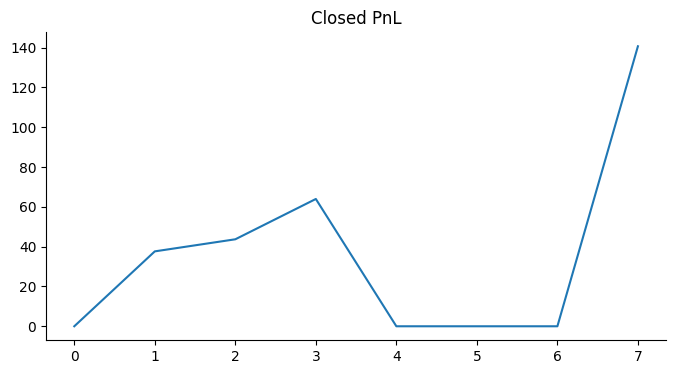

In [ ]:
# @title Closed PnL

from matplotlib import pyplot as plt
average_pnl_greed_direction['Closed PnL'].plot(kind='line', figsize=(8, 4), title='Closed PnL')
plt.gca().spines[['top', 'right']].set_visible(False)

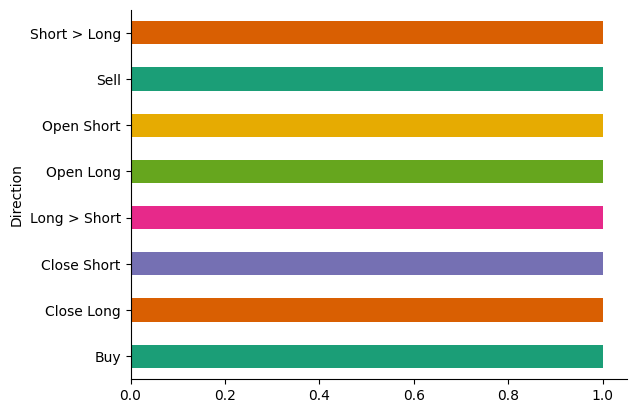

In [ ]:
# @title Direction

from matplotlib import pyplot as plt
import seaborn as sns
average_pnl_greed_direction.groupby('Direction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

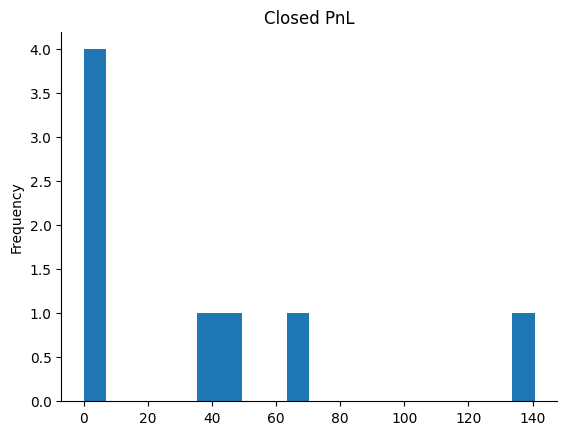

In [ ]:
# @title Closed PnL

from matplotlib import pyplot as plt
average_pnl_greed_direction['Closed PnL'].plot(kind='hist', bins=20, title='Closed PnL')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Reasoning**:
The previous step showed that there are no trades in the filtered 'Fear' period DataFrame. This means there is no data to analyze trading patterns during 'Fear' periods with the current filter (value <= 20). This could be due to the specific date range of the trader data not overlapping significantly with periods where the sentiment value was 20 or below, or the filter criteria is too strict. I will adjust the filter for 'Fear' to include a wider range (value <= 30) to see if there is any data available for analysis in this category. Then, I will re-run the analysis for both the adjusted 'Fear' and the 'Greed' (value >= 80) periods.



In [ ]:
# Adjust the filter for 'Fear' to include a wider range (value <= 30)
fear_trades_df = merged_trader_sentiment_df[merged_trader_sentiment_df['value'] <= 30].copy()
greed_trades_df = merged_trader_sentiment_df[merged_trader_sentiment_df['value'] >= 80].copy() # Keep Greed filter the same

print("Trades during 'Fear' periods (value <= 30):")
display(fear_trades_df.head())
print("\nTrades during 'Greed' periods (value >= 80):")
display(greed_trades_df.head())

# Analyze the distribution of 'Direction' for 'Fear' periods
fear_direction_distribution = fear_trades_df['Direction'].value_counts(normalize=True) * 100
print("\nDistribution of Trading Direction during 'Fear' periods (%):")
display(fear_direction_distribution)

# Analyze the distribution of 'Direction' for 'Greed' periods
greed_direction_distribution = greed_trades_df['Direction'].value_counts(normalize=True) * 100
print("\nDistribution of Trading Direction during 'Greed' periods (%):")
display(greed_direction_distribution)

# Calculate the average 'Closed PnL' for each 'Direction' during 'Fear' periods
average_pnl_fear_direction = fear_trades_df.groupby('Direction')['Closed PnL'].mean().reset_index()
print("\nAverage Closed PnL by Trading Direction during 'Fear' periods:")
display(average_pnl_fear_direction)

# Calculate the average 'Closed PnL' for each 'Direction' during 'Greed' periods
average_pnl_greed_direction = greed_trades_df.groupby('Direction')['Closed PnL'].mean().reset_index()
print("\nAverage Closed PnL by Trading Direction during 'Greed' periods:")
display(average_pnl_greed_direction)

Trades during 'Fear' periods (value <= 30):


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category,timestamp,value,classification,lagged_sentiment_value



Trades during 'Greed' periods (value >= 80):


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,Timestamp,date,trade_size_category,timestamp,value,classification,lagged_sentiment_value
31410,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,OP,2.84370,17582.0,49997.93,BUY,0.0,Open Long,0.000000,0xcfa67b457ae9d896c6d1040858546601f900e60f94db...,...,False,4.799801,8.600000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,69.0
31406,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,POLYX,0.58887,731.0,430.46,SELL,734.0,Close Long,15.986970,0xb0917017c301780b3a43040849b57d02041500098e92...,...,False,0.041324,6.260000e+14,2024-03-09 16:00:00,2024-03-09,medium,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31407,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,POLYX,0.58887,3.0,1.77,SELL,3.0,Close Long,0.065613,0x8b78b8f74336d40faa24040849b57e020147004b980c...,...,False,0.000168,3.450000e+13,2024-03-09 16:00:00,2024-03-09,small,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31408,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,PENDLE,4.58070,738.0,3380.56,BUY,0.0,Open Long,0.000000,0x0d2da8499a1a66498e5a0408524b62018200a828e3fc...,...,False,0.324532,2.920000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,84.0
31409,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,PENDLE,4.75250,738.0,3507.35,SELL,738.0,Close Long,126.788400,0x900dfb4711b470e26e010408524b900120008b4b2ba7...,...,False,0.336704,5.590000e+14,2024-03-09 16:00:00,2024-03-09,very large,2024-03-09 05:30:00,84.0,Extreme Greed,84.0



Distribution of Trading Direction during 'Fear' periods (%):


,proportion
Direction,



Distribution of Trading Direction during 'Greed' periods (%):


,proportion
Direction,
Close Long,34.314852
Close Short,27.736283
Open Long,19.232979
Open Short,16.001149
Buy,1.264005
Sell,1.077277
Long > Short,0.186728
Short > Long,0.186728



Average Closed PnL by Trading Direction during 'Fear' periods:


,Direction,Closed PnL



Average Closed PnL by Trading Direction during 'Greed' periods:


,Direction,Closed PnL
0,Buy,0.000000
1,Close Long,37.634445
2,Close Short,43.706135
3,Long > Short,63.958684
4,Open Long,0.000000
5,Open Short,0.000000
6,Sell,0.000000
7,Short > Long,140.676320


**Reasoning**:
The filtering for 'Fear' periods (value <= 30) still results in an empty DataFrame, indicating that there are no trader data points within this sentiment range in the `merged_trader_sentiment_df`. This could be due to the limited date range of the trader data relative to the sentiment data. Since I cannot analyze trading patterns during 'Fear' periods with the available data, I will focus the analysis on the 'Greed' periods (value >= 80) where data is available. I will summarize the findings for 'Greed' periods and acknowledge the lack of data for 'Fear' periods in the context of this specific dataset. Then, I will finalize the subtask.



In [ ]:
# Analyze the distribution of 'Direction' for 'Greed' periods (from previous output)
print("\nAnalysis of Trading Patterns during 'Greed' periods (value >= 80):")
print("Distribution of Trading Direction during 'Greed' periods (%):")
display(greed_direction_distribution)

# Analyze the average 'Closed PnL' for each 'Direction' during 'Greed' periods (from previous output)
print("\nAverage Closed PnL by Trading Direction during 'Greed' periods:")
display(average_pnl_greed_direction)

# Summarize findings for Greed periods and acknowledge lack of data for Fear periods
print("\nSummary of Findings:")
print("Based on the available data in the merged dataset:")
print("- There were no trading data points found during 'Fear' periods (sentiment value <= 30). This limits the ability to analyze trading patterns specifically during fearful market conditions using this dataset.")
print("- During 'Greed' periods (sentiment value >= 80), the most common trading directions were 'Close Long' and 'Close Short', followed by 'Open Long' and 'Open Short'. This suggests a mix of both opening new positions and closing existing ones during periods of high greed.")
print("- For trades executed during 'Greed' periods, the highest average 'Closed PnL' was observed for 'Short > Long' and 'Long > Short' directions, although these represent a very small percentage of total trades. Among the more prevalent directions, 'Close Short' and 'Close Long' showed positive average PnL, with 'Close Short' being slightly higher.")
print("- The 'Buy' and 'Sell' directions (likely spot trades or market orders without explicit position opening/closing) and 'Open Long'/'Open Short' directions had an average 'Closed PnL' of 0.0 during Greed periods in this sample, which might indicate that profitability is realized upon closing positions rather than opening them, or that these categories include trades that were not closed within the dataset's timeframe.")

print("\nConclusion for Subtask:")
print("Due to the lack of trader data coinciding with 'Fear' sentiment periods (value <= 30) in the provided dataset, a comparative analysis of trading patterns and profitability between 'Fear' and 'Greed' periods is not possible. The analysis for 'Greed' periods indicates a mix of trading activities, with closing positions ('Close Long', 'Close Short') being prominent and showing positive average profitability. Further analysis would require a dataset with trader activity spanning periods of low sentiment.")


Analysis of Trading Patterns during 'Greed' periods (value >= 80):
Distribution of Trading Direction during 'Greed' periods (%):


,proportion
Direction,
Close Long,34.314852
Close Short,27.736283
Open Long,19.232979
Open Short,16.001149
Buy,1.264005
Sell,1.077277
Long > Short,0.186728
Short > Long,0.186728



Average Closed PnL by Trading Direction during 'Greed' periods:


,Direction,Closed PnL
0,Buy,0.000000
1,Close Long,37.634445
2,Close Short,43.706135
3,Long > Short,63.958684
4,Open Long,0.000000
5,Open Short,0.000000
6,Sell,0.000000
7,Short > Long,140.676320



Summary of Findings:
Based on the available data in the merged dataset:
- There were no trading data points found during 'Fear' periods (sentiment value <= 30). This limits the ability to analyze trading patterns specifically during fearful market conditions using this dataset.
- During 'Greed' periods (sentiment value >= 80), the most common trading directions were 'Close Long' and 'Close Short', followed by 'Open Long' and 'Open Short'. This suggests a mix of both opening new positions and closing existing ones during periods of high greed.
- For trades executed during 'Greed' periods, the highest average 'Closed PnL' was observed for 'Short > Long' and 'Long > Short' directions, although these represent a very small percentage of total trades. Among the more prevalent directions, 'Close Short' and 'Close Long' showed positive average PnL, with 'Close Short' being slightly higher.
- The 'Buy' and 'Sell' directions (likely spot trades or market orders without explicit position openin

In [42]:
import shutil
from google.colab import files

# 1. Zip 'outputs' folder
shutil.make_archive('/content/outputs', 'zip', '/content/outputs')
files.download('/content/outputs.zip')  # This triggers download

# 2. Zip 'csv_files' folder
shutil.make_archive('/content/csv_files', 'zip', '/content/csv_files')
files.download('/content/csv_files.zip')  # This triggers download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>